In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model performance load

### S. lycopersicum

In [2]:
l = pd.read_csv('./output/performance_model_lycopersicum_kmers.csv')
l

,chr,corr,R^2,MSE
0,chr1,0.871434,0.722333,0.008403
1,chr2,0.813087,0.308118,0.009735
2,chr3,0.843979,0.685377,0.008982
3,chr4,0.808353,0.618949,0.011925
4,chr5,0.810285,0.643644,0.008321
5,chr6,0.756440,0.570843,0.010992
6,chr7,0.862562,0.676451,0.011748
7,chr8,0.858841,0.688144,0.009091
8,chr9,0.925904,0.726442,0.011624
9,chr10,0.606018,0.310545,0.051308


### S. pimpinellifolium

In [3]:
p = pd.read_csv('./output/performance_model_pimpinellifolium_kmers.csv')
p

,chr,corr,R^2,MSE
0,chr1,0.802727,0.644265,0.012614
1,chr2,0.707270,0.024757,0.019632
2,chr3,0.828473,0.659579,0.011202
3,chr4,0.762849,0.495920,0.019199
4,chr5,0.743093,0.412623,0.018317
5,chr6,0.650279,0.336227,0.020798
6,chr7,0.813218,0.656879,0.016488
7,chr8,0.836041,0.697294,0.010338
8,chr9,0.875019,0.742599,0.011792
9,chr10,0.806547,0.642203,0.013533


### Trained in S. pimpinellifolium to predict in S. lycopersium

In [4]:
tp_pl = pd.read_csv('./output/performance_model_trained_in_pimpinellifolium_to_predict_in_lycopersicum_kmers.csv')
tp_pl

,chr,corr,R^2,MSE
0,chr1,0.822022,0.674828,0.012476
1,chr2,0.760119,0.376137,0.013069
2,chr3,0.872666,0.741073,0.009870
3,chr4,0.803947,0.607798,0.016885
4,chr5,0.778070,0.539908,0.015110
5,chr6,0.672664,0.428918,0.020863
6,chr7,0.816645,0.666154,0.017242
7,chr8,0.894197,0.796756,0.007851
8,chr9,0.911857,0.797546,0.011255
9,chr10,0.856173,0.727861,0.011152


### Trained in S. lycopersicum to predict in S. pimpinellifolium

In [5]:
tl_pp = pd.read_csv('./output/performance_model_trained_in_lycopersicum_to_predict_in_pimpinellifolium_kmers.csv')
tl_pp

,chr,corr,R^2,MSE
0,chr1,0.833645,0.690707,0.010967
1,chr2,0.726181,0.162057,0.016869
2,chr3,0.840489,0.648422,0.011569
3,chr4,0.757267,0.457950,0.020645
4,chr5,0.754659,0.443743,0.017346
5,chr6,0.502275,-0.018375,0.031908
6,chr7,0.795009,0.623518,0.018091
7,chr8,0.611190,0.161552,0.028634
8,chr9,0.898857,0.785233,0.009839
9,chr10,0.860414,0.717406,0.010688


# Summary table

In [6]:
corr = pd.DataFrame({'corr':[l['corr'].mean().round(3), p['corr'].mean().round(3), tp_pl['corr'].mean().round(3), tl_pp['corr'].mean().round(3)]})
r2 = pd.DataFrame({'R^2':[l['R^2'].mean().round(3), p['R^2'].mean().round(3), tp_pl['R^2'].mean().round(3), tl_pp['R^2'].mean().round(3)]})
mse = pd.DataFrame({'MSE':[l['MSE'].mean().round(3), p['MSE'].mean().round(3), tp_pl['MSE'].mean().round(3), tl_pp['MSE'].mean().round(3)]})
training = pd.DataFrame({'Training set': ['S. lycopersicum', 'S. pimpinellifolium', 'S. pimpinellifolium', 'S. lycopersicum']})
testing = pd.DataFrame({'Testing set': ['S. lycopersicum', 'S. pimpinellifolium', 'S. lycopersicum', 'S. pimpinellifolium' ]})
cv = pd.DataFrame({'Cross-validation': ['CV1', 'CV1', 'CV2', 'CV2']})

table = pd.concat([cv, training, testing, corr, r2, mse], axis=1)
table

,Cross-validation,Training set,Testing set,corr,R^2,MSE
0,CV1,S. lycopersicum,S. lycopersicum,0.829,0.606,0.015
1,CV1,S. pimpinellifolium,S. pimpinellifolium,0.791,0.544,0.016
2,CV2,S. pimpinellifolium,S. lycopersicum,0.827,0.650,0.014
3,CV2,S. lycopersicum,S. pimpinellifolium,0.748,0.422,0.021


# Comparison plot

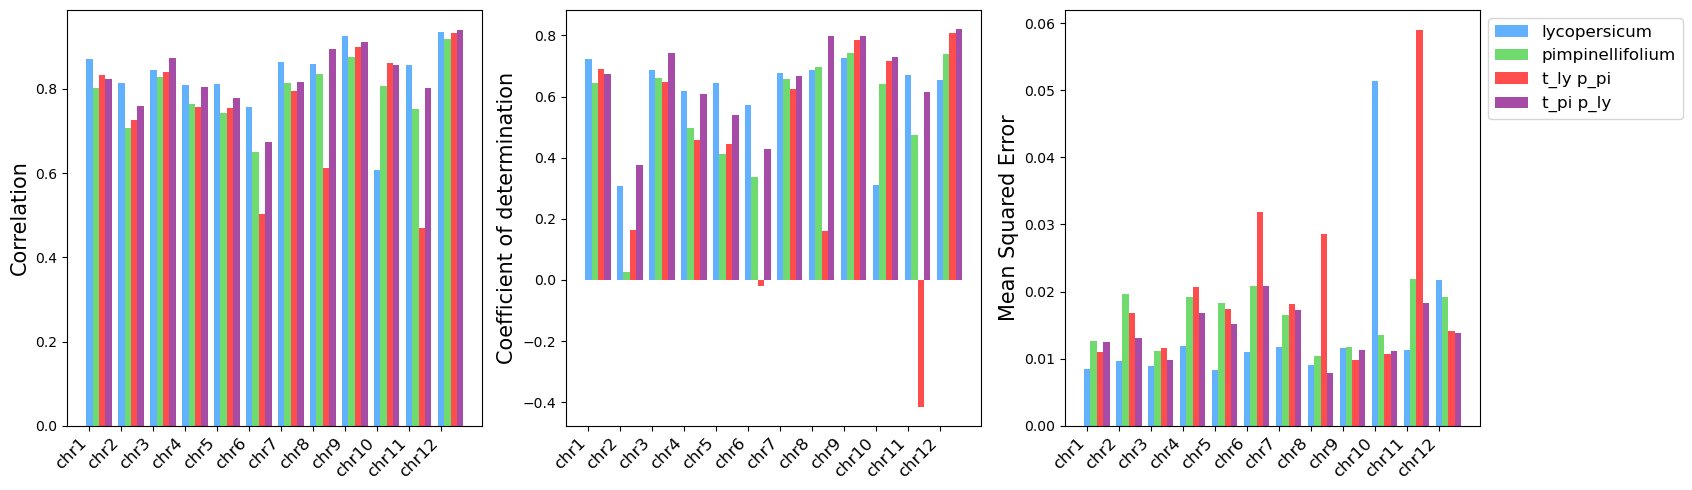

In [7]:
# Adjusting bar width
bar_width = 0.2

# Creating data positions
bar_positions_l = np.arange(len(l['chr']))
bar_positions_p = bar_positions_l + bar_width
bar_positions_tl_pp = bar_positions_p + bar_width
bar_positions_tp_pl = bar_positions_tl_pp + bar_width


# Creating subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First chart
axs[0].bar(bar_positions_l, l['corr'], color='dodgerblue', width=bar_width, label='lycopersicum', alpha=0.7)
axs[0].bar(bar_positions_p, p['corr'], color='limegreen', width=bar_width, label='pimpinellifolium', alpha=0.7)
axs[0].bar(bar_positions_tl_pp, tl_pp['corr'], color='red', width=bar_width, label='t_ly p_pi', alpha=0.7)
axs[0].bar(bar_positions_tp_pl, tp_pl['corr'], color='purple', width=bar_width, label='t_pi p_ly', alpha=0.7)

axs[0].set_ylabel('Correlation', fontsize=15)

# Second chart
axs[1].bar(bar_positions_l, l['R^2'], color='dodgerblue', width=bar_width, label='lycopersicum', alpha=0.7)
axs[1].bar(bar_positions_p, p['R^2'], color='limegreen', width=bar_width, label='pimpinellifolium', alpha=0.7)
axs[1].bar(bar_positions_tl_pp, tl_pp['R^2'], color='red', width=bar_width, label='t_ly p_pi', alpha=0.7)
axs[1].bar(bar_positions_tp_pl, tp_pl['R^2'], color='purple', width=bar_width, label='t_pi p_ly', alpha=0.7)

axs[1].set_ylabel('Coefficient of determination', fontsize=15)

# Third chart
axs[2].bar(bar_positions_l, l['MSE'], color='dodgerblue', width=bar_width, label='lycopersicum', alpha=0.7)
axs[2].bar(bar_positions_p, p['MSE'], color='limegreen', width=bar_width, label='pimpinellifolium', alpha=0.7)
axs[2].bar(bar_positions_tl_pp, tl_pp['MSE'], color='red', width=bar_width, label='t_ly p_pi', alpha=0.7)
axs[2].bar(bar_positions_tp_pl, tp_pl['MSE'], color='purple', width=bar_width, label='t_pi p_ly', alpha=0.7)

axs[2].set_ylabel('Mean Squared Error', fontsize=15)

# Get chromosome labels from the 'chr' column
chr_labels = l['chr']

# Set x-axis labels for all three subplots
for ax in axs:
    ax.set_xticks(bar_positions_l)
    ax.set_xticklabels(chr_labels)

# Rotate labels for better readability
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Adjusting layout
plt.tight_layout()

# Place legend outside the subplots and above the last subplot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the figure
plt.show()